## RandomForestRegressor Experiment
* Trying RandomForest to predict time-series
* Tends to over-fit training data

In [98]:
import pandas as pd
from numpy import array
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Sliding window from lesson 2
def sliding_window(li, step):
    import numpy as np
    idx = [(i, i+step) for i in range(0, len(li)-step)]
    X = []
    y = []
    for i, j in idx:
        X.append(li[i:j])
        y.append(li[j])
    return np.array(X), np.array(y)

# read data
df = pd.read_csv('data/daily-total-female-births.csv')
s = df.sort_values('Date')['Births'].values

window_size = 7 # after experimenting with various window size, 7 works the best

# sliding window
X, y = sliding_window(s, window_size)

# split into train, test
sep = int(len(X) * 1/2)
train_X, train_y = X[:sep], y[:sep]
test_X, test_y = X[sep:], y[sep:]

# define model
model = RandomForestRegressor(n_estimators=100)

# fit model
model.fit(train_X, train_y)

# demonstrate prediction
pred_y = model.predict(test_X)
mean_squared_error(test_y, pred_y)

70.59846368715084

### Predict Test Data
* Can be seen in the plot that the model is able to predict the trend of total female births

MSE: 70.59846368715084


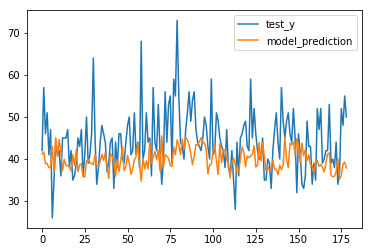

In [99]:
# demonstrate prediction
pred_y = model.predict(test_X)
print('MSE:', mean_squared_error(test_y, pred_y))

# plot test_y, pred_y
plt.plot(test_y.reshape(-1,1))
plt.plot(pred_y)
plt.legend(['test_y', 'model_prediction'])
plt.show()

### Fit whole data
* This is plot on predicting the whole dataset (training + testing)
* The model is able to predict the data

MSE: 39.16075083798883


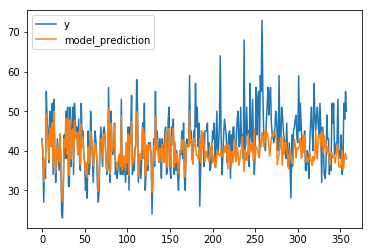

In [100]:
# demonstrate prediction
pred_y = model.predict(X)
print('MSE:', mean_squared_error(y, pred_y))

# plot test_y, pred_y
plt.plot(y.reshape(-1,1))
plt.plot(pred_y)
plt.legend(['y', 'model_prediction'])
plt.show()
